### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [25]:
faturamento = (
    combined_df
    .groupby("Loja")["Preço"]
    .sum()
    .reset_index()
    .rename(columns={"Preço": "Faturamento"})
)

faturamento["Faturamento"] = faturamento["Faturamento"].round(2)

faturamento

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


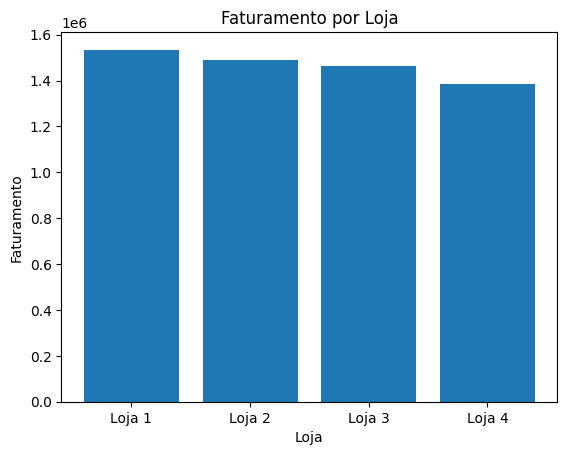

In [27]:

plt.figure()
plt.bar(faturamento["Loja"], faturamento["Faturamento"])
plt.title("Faturamento por Loja")
plt.xlabel("Loja")
plt.ylabel("Faturamento")
plt.show()


# 2. Vendas por Categoria

In [29]:
vendas_categoria = (
    combined_df
    .groupby("Categoria do Produto")
    .size()
    .reset_index(name="Numero de Vendas")
)

vendas_categoria["Numero de Vendas"] = vendas_categoria["Numero de Vendas"].round(0)

vendas_categoria

,Categoria do Produto,Numero de Vendas
0,brinquedos,1290
1,eletrodomesticos,1149
2,eletronicos,1772
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
6,moveis,1886
7,utilidades domesticas,730


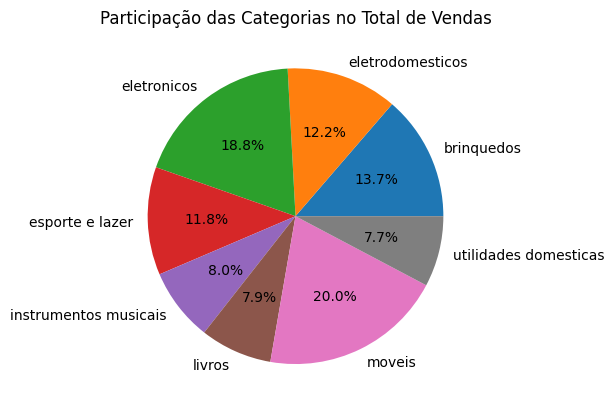

In [54]:
plt.figure()
plt.pie(
    vendas_categoria["Numero de Vendas"],
    labels=vendas_categoria["Categoria do Produto"],
    autopct="%1.1f%%"
)
plt.title("Participação das Categorias no Total de Vendas")
plt.show()


# 3. Média de Avaliação das Lojas


In [32]:
media_avaliacao = (
    combined_df
    .groupby("Loja")["Avaliação da compra"]
    .mean()
    .reset_index()
    .rename(columns={"Avaliação da compra": "Media de Avaliacao"})
)

media_avaliacao["Media de Avaliacao"] = media_avaliacao["Media de Avaliacao"].round(2)

media_avaliacao

,Loja,Media de Avaliacao
0,Loja 1,3.98
1,Loja 2,4.04
2,Loja 3,4.05
3,Loja 4,4.00


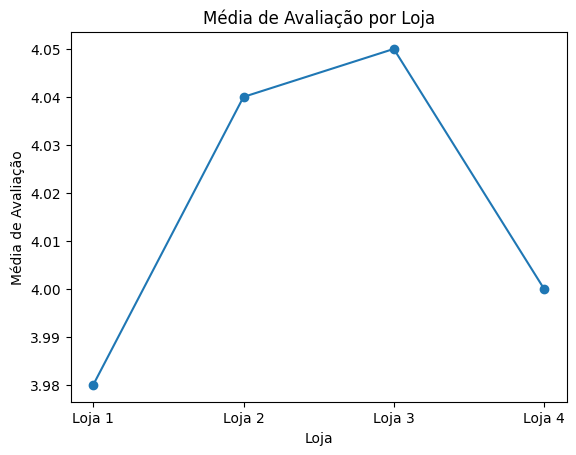

In [53]:
plt.figure()
plt.plot(
    media_avaliacao["Loja"],
    media_avaliacao["Media de Avaliacao"],
    marker="o"
)
plt.title("Média de Avaliação por Loja")
plt.xlabel("Loja")
plt.ylabel("Média de Avaliação")
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [52]:
produtos_vendidos = (
    combined_df
    .groupby("Produto")
    .size()
    .reset_index(name="Numero de Vendas")
)

produtos_vendidos["Numero de Vendas"] = produtos_vendidos["Numero de Vendas"].round(0)


mais_vendidos = produtos_vendidos.sort_values(
    by="Numero de Vendas", ascending=False
).head(5)

menos_vendidos = produtos_vendidos.sort_values(
    by="Numero de Vendas", ascending=True
).head(5)

tabela_produtos = pd.DataFrame({
    "Mais Vendidos": mais_vendidos["Produto"].values,
    "Menos Vendidos": menos_vendidos["Produto"].values
})

tabela_produtos

,Mais Vendidos,Menos Vendidos
0,Cômoda,Celular ABXY
1,Carrinho controle remoto,Headset
2,Micro-ondas,Mochila
3,Bateria,Guitarra
4,Cama king,Ciência de dados com python


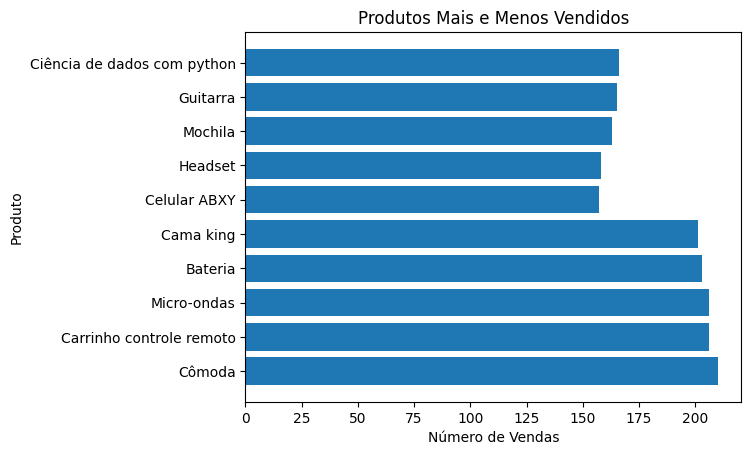

In [38]:
grafico_produtos = pd.concat([
    mais_vendidos.assign(Tipo="Mais Vendidos"),
    menos_vendidos.assign(Tipo="Menos Vendidos")
])

plt.figure()
plt.barh(
    grafico_produtos["Produto"],
    grafico_produtos["Numero de Vendas"]
)
plt.title("Produtos Mais e Menos Vendidos")
plt.xlabel("Número de Vendas")
plt.ylabel("Produto")
plt.show()


# 5. Frete Médio por Loja

In [40]:
frete_medio = (
    combined_df
    .groupby("Loja")["Frete"]
    .mean()
    .reset_index()
    .rename(columns={"Frete": "Frete Medio"})
)

frete_medio["Frete Medio"] = frete_medio["Frete Medio"].round(2)

frete_medio

,Loja,Frete Medio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


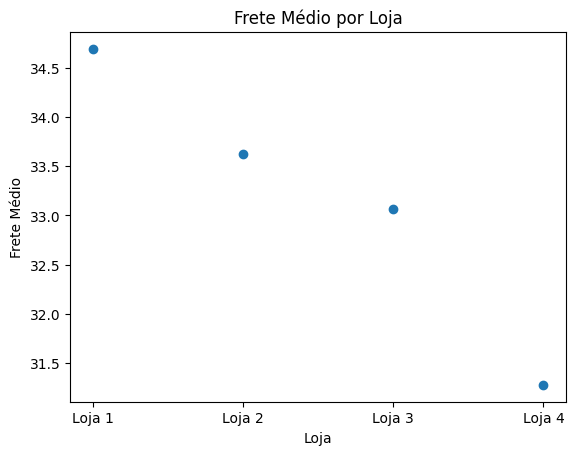

In [45]:
plt.figure()
plt.plot(
    frete_medio["Loja"],
    frete_medio["Frete Medio"],
    linestyle="",
    marker="o"
)
plt.title("Frete Médio por Loja")
plt.xlabel("Loja")
plt.ylabel("Frete Médio")
plt.show()




# 6. Análise de Desempenho Geográfico

In [47]:
dados_geo = combined_df[["Loja", "lat", "lon", "Preço", "Avaliação da compra"]]
dados_geo.head()

,Loja,lat,lon,Preço,Avaliação da compra
0,Loja 1,-22.19,-48.79,219.08,4
1,Loja 1,-22.25,-42.66,256.35,1
2,Loja 1,-15.83,-47.86,279.51,1
3,Loja 1,-30.17,-53.50,1009.99,4
4,Loja 1,-18.10,-44.38,446.99,5


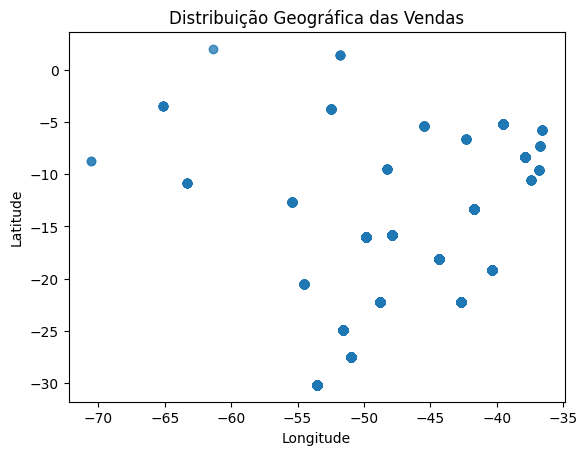

In [48]:
plt.figure()
plt.scatter(dados_geo["lon"], dados_geo["lat"], alpha=0.5)
plt.title("Distribuição Geográfica das Vendas")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


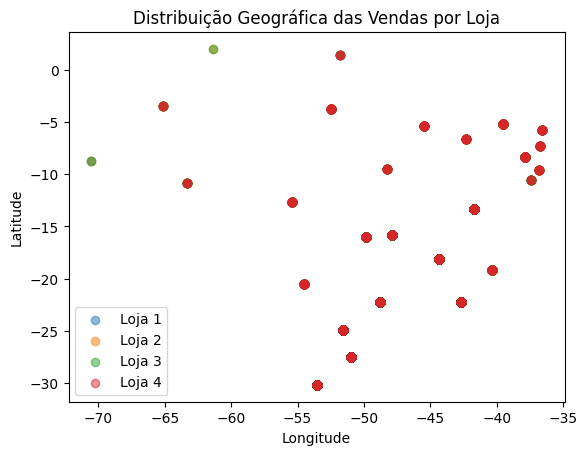

In [49]:
for loja in dados_geo["Loja"].unique():
    dados_loja = dados_geo[dados_geo["Loja"] == loja]
    plt.scatter(dados_loja["lon"], dados_loja["lat"], label=loja, alpha=0.5)

plt.title("Distribuição Geográfica das Vendas por Loja")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


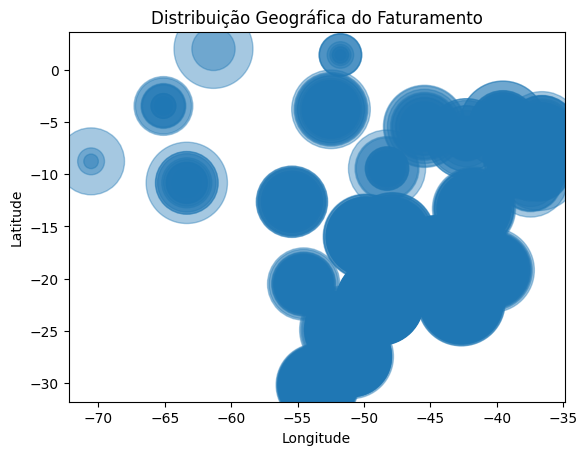

In [50]:
plt.figure()
plt.scatter(
    dados_geo["lon"],
    dados_geo["lat"],
    s=dados_geo["Preço"],
    alpha=0.4
)
plt.title("Distribuição Geográfica do Faturamento")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


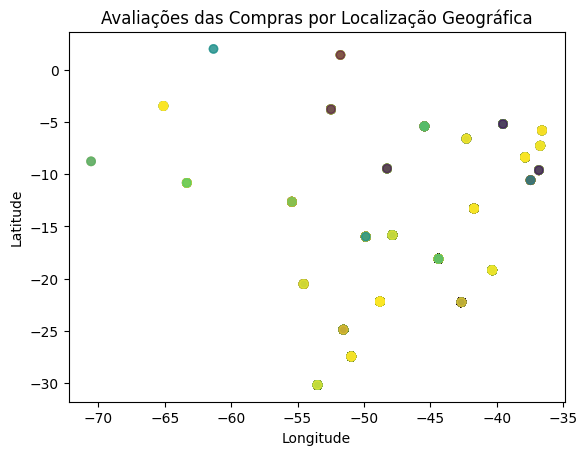

In [51]:
plt.figure()
plt.scatter(
    dados_geo["lon"],
    dados_geo["lat"],
    c=dados_geo["Avaliação da compra"],
    alpha=0.6
)
plt.title("Avaliações das Compras por Localização Geográfica")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# 7. Relatório Final

Após a análise de todos os dados podemos concluir que a Loja 4 é a mais indicada para ser vendida, pois ela apresentou o menor faturamento quando comparada às outras lojas, além de avaliações médias mais baixas, o que demonstra menor satisfação dos clientes. Também foi observado que o frete médio é mais alto, tornando a loja menos atrativa para os consumidores. Outro ponto importante é que seus produtos possuem menor volume de vendas e a loja não apresenta bom desempenho em regiões específicas. Dessa forma, a venda da Loja 4 permite ao Sr. João investir em outro negócio com melhores perspectivas de crescimento e retorno financeiro.